In [11]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import random

#Import your modules
#---------------------------------------

import admin_functions as adfn
import metastability as mfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.4 (default, Aug 13 2019, 15:17:50) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Load developmental data

In [5]:
#Load developmental data
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*')
bind_l

['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-6

In [16]:
#prac = np.load(bind_l[3])
prac.shape

(14654, 4914)

In [ ]:
from sklearn.cluster import AffinityPropagation
import copy

data_list = bind_l
for e in range(len(data_list)):
  for i in range(len(data_list[e])):
    data = np.load(data_list[e][i])[:,1:-1].T
    name = data_list[e][i]

    #Empirical data
    all_clust, sub_clust = mfn.affprop(data) #cluster with affinity prop on empirical data
    emp_sim = mfn.Sim_loop(data, all_clust, sub_clust) #calculate similarity between clustered states

    #Generate null data
    rpks = np.zeros((data.shape))
    for t in range(data.shape[0]):
        temp_pks = data[t]
        np.random.shuffle(temp_pks) 
        rpks[t] = temp_pks

    null_all_clust, null_sub_clust = mfn.affprop(rpks) #cluster with affinity prop on null data
    null_sim = mfn.Sim_loop(rpks, null_all_clust, null_sub_clust) #calculate similarity between clustered states
    n_states = len(emp_sim > np.max(null_sim))
    if len(emp_sim) > n_states:
      print('null model removed a cluster')

    fin_clust = sub_clust[emp_sim > max(null_sim)] #Find the clusters that occur above chance
    p_state, m_dwell, v_dwell = mfn.state_stats(fin_clust, all_clust) #Calculate state transition statistics
    null_m_dwell = mfn.null_states(fin_clust, data) #Calculate the mean dwell time with random dynamics
    np.save(Fdata +  name[:name.find('run')+6] + '_' +'metastates.npy', [n_states, p_state, m_dwell, null_m_dwell, v_dwell]) 

  print('Done' + str(e))

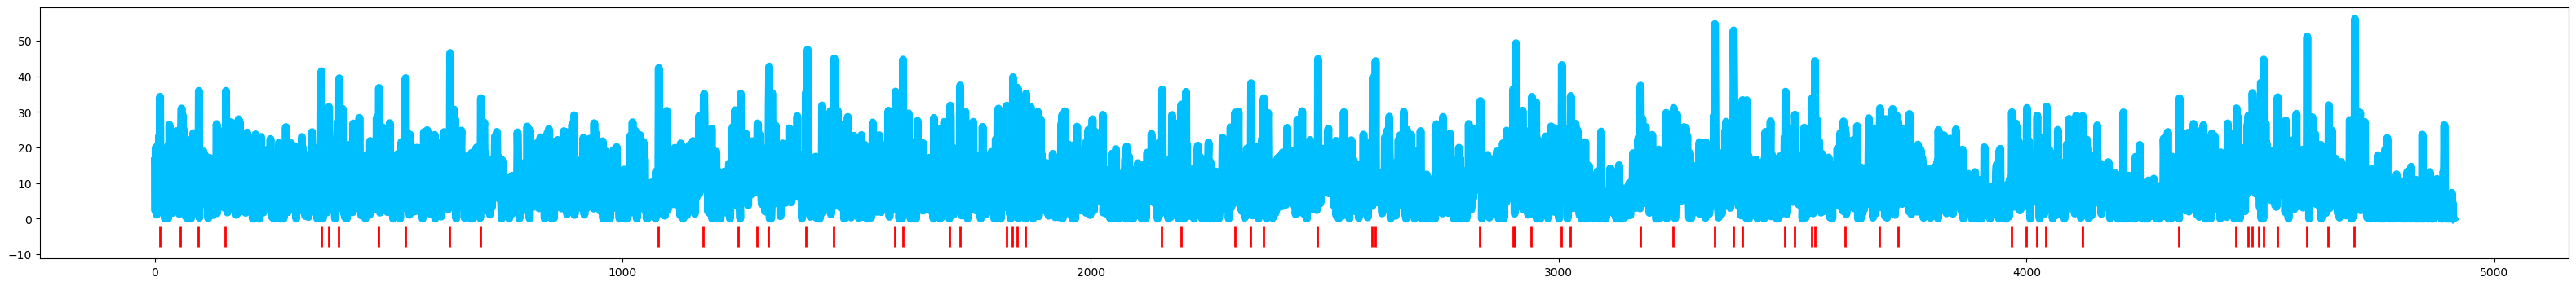

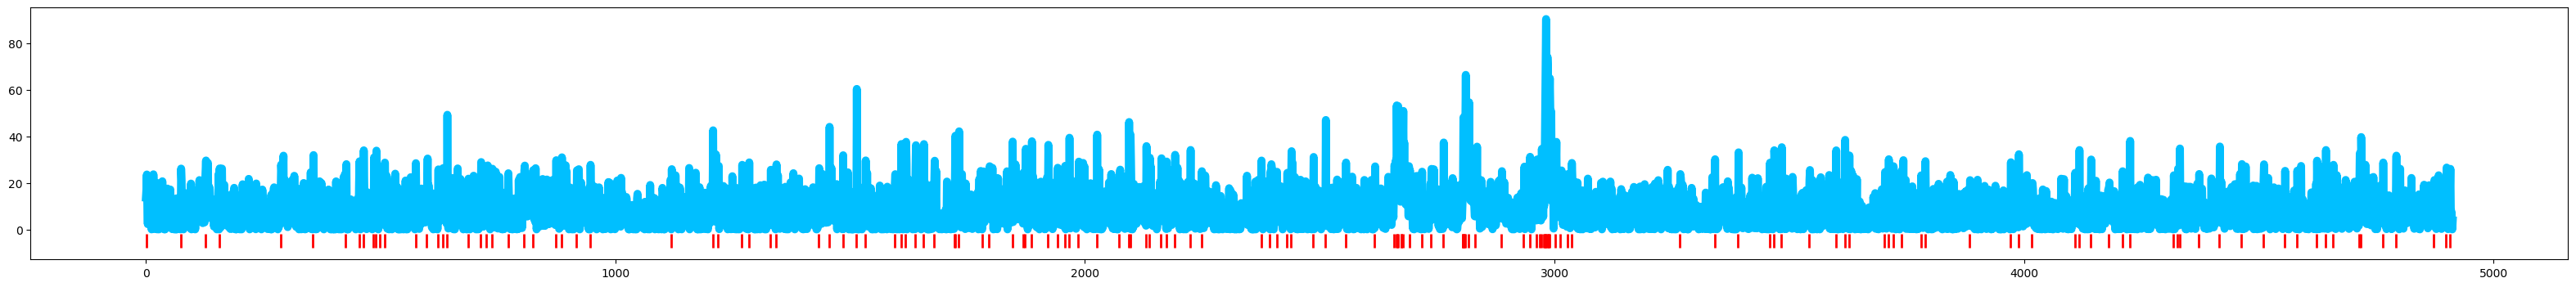

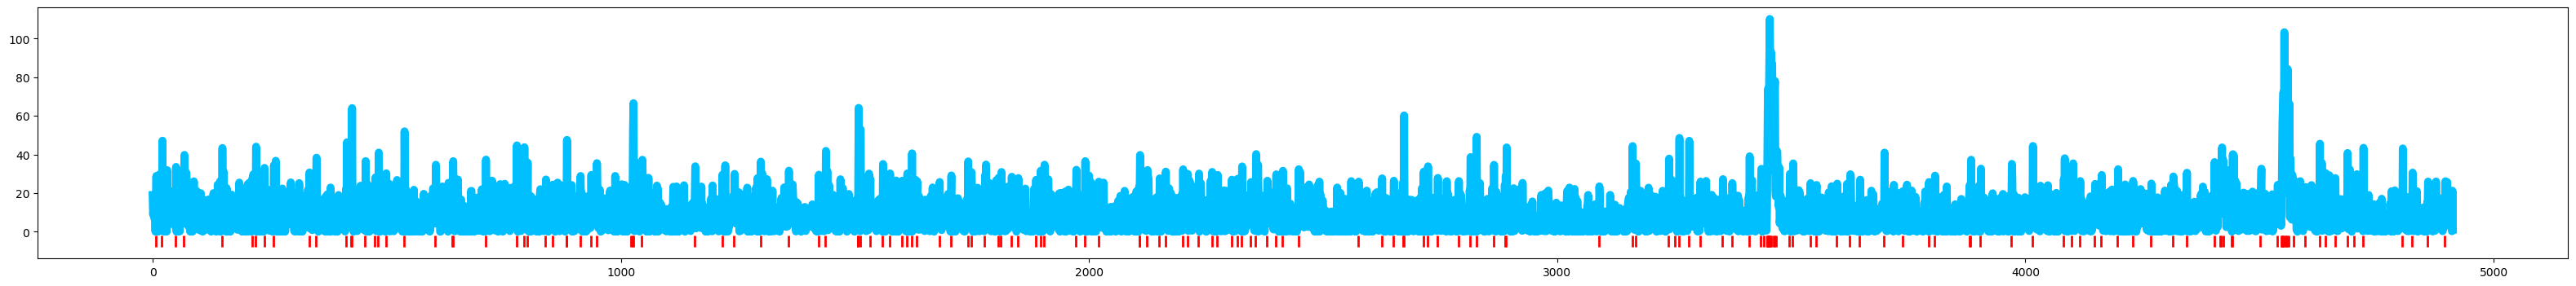

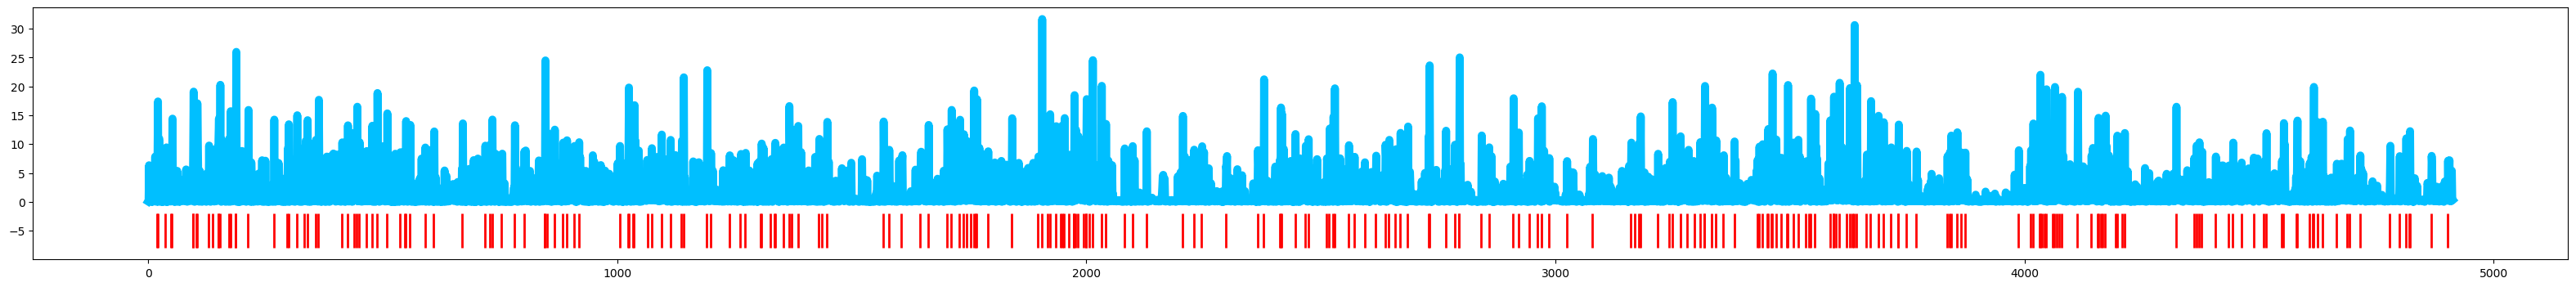

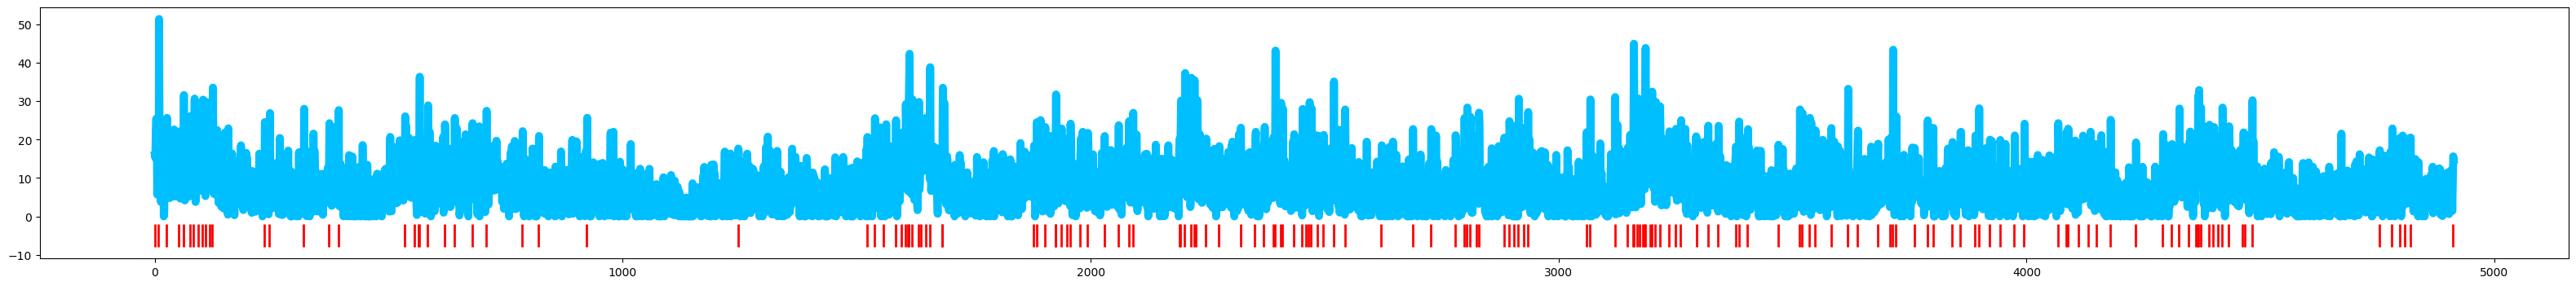

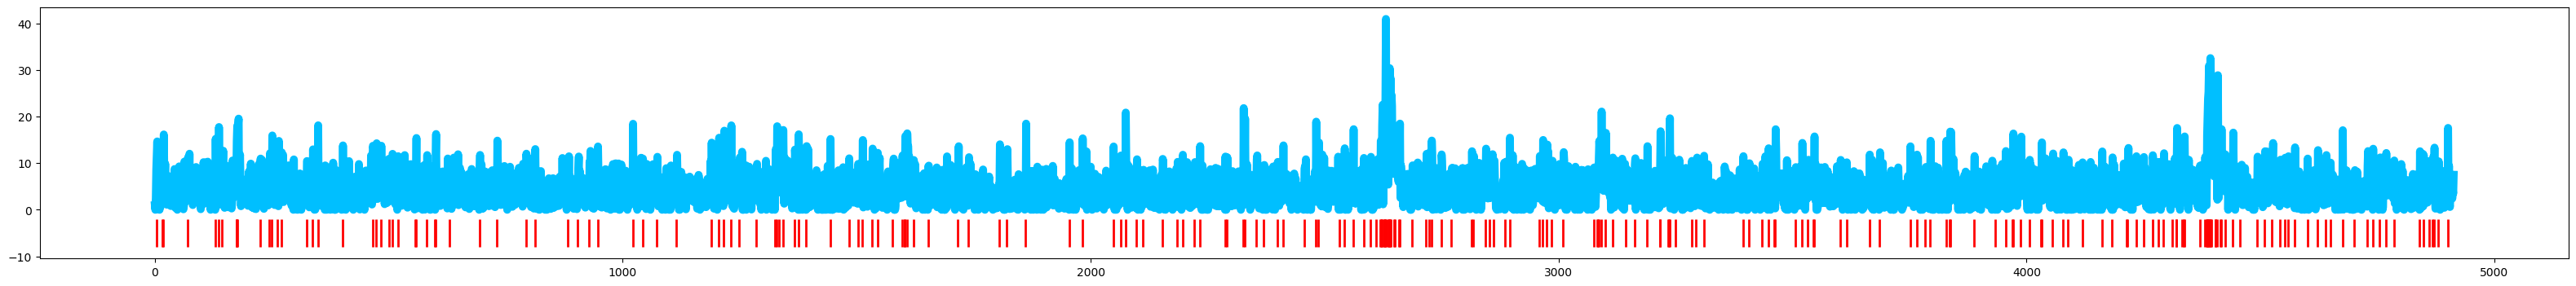

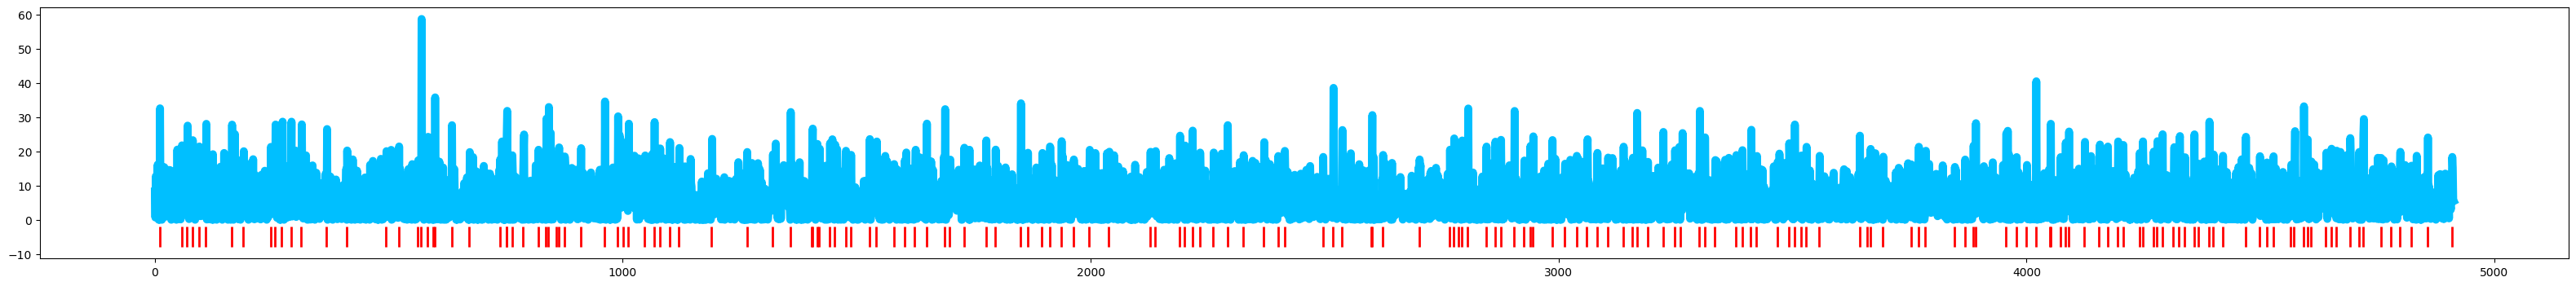

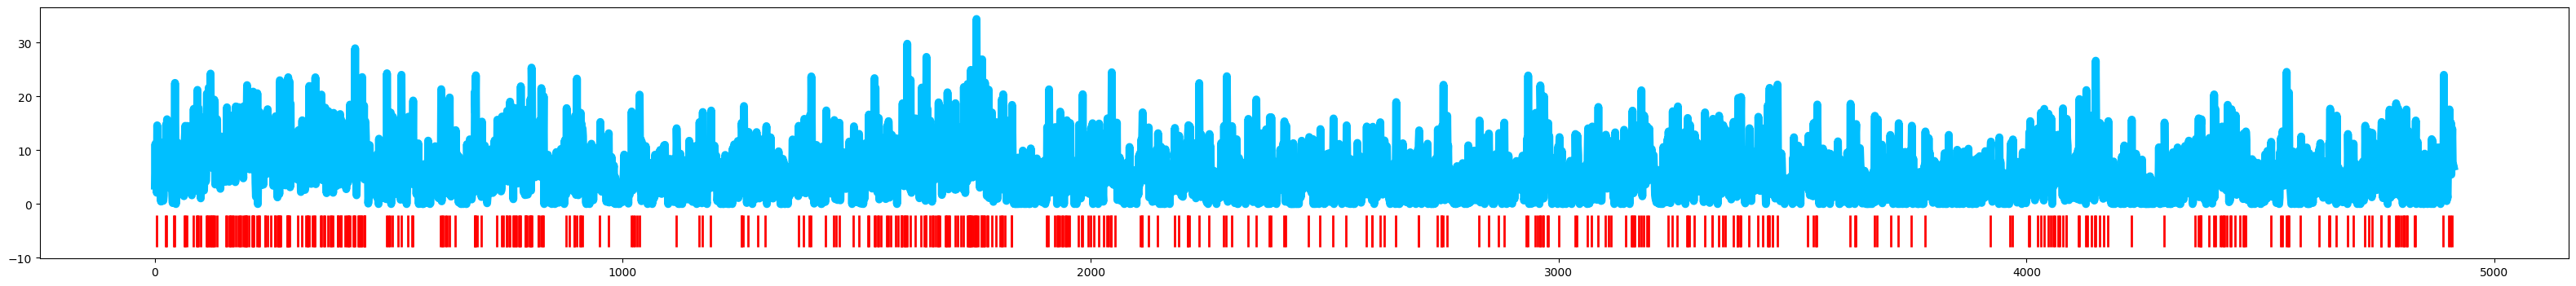

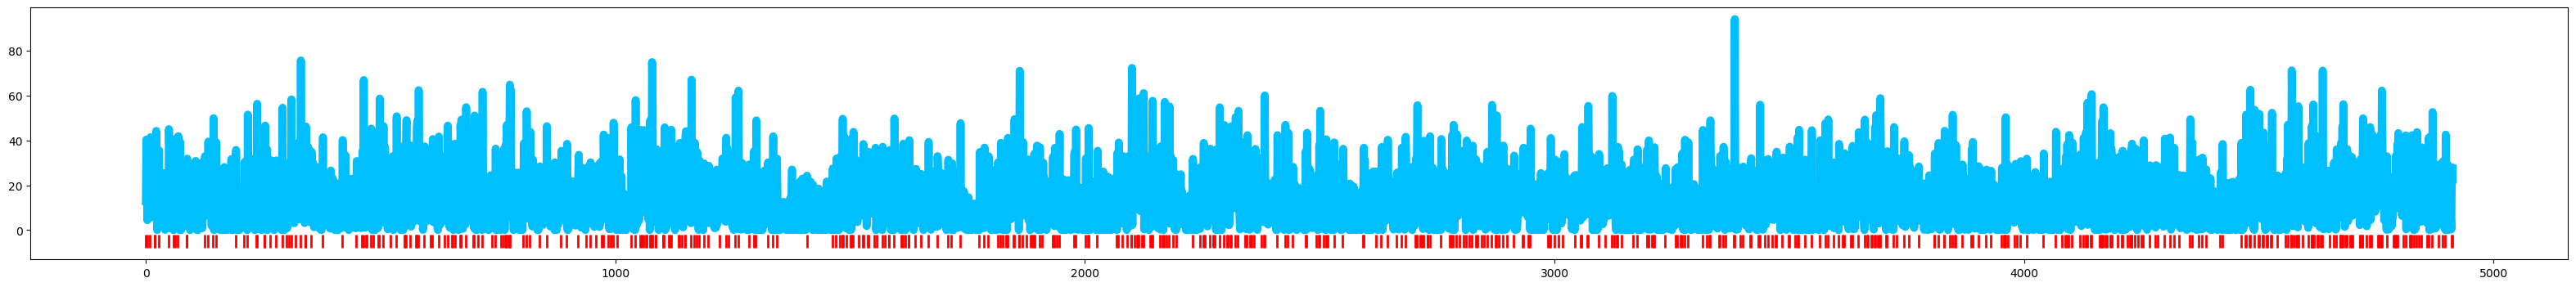

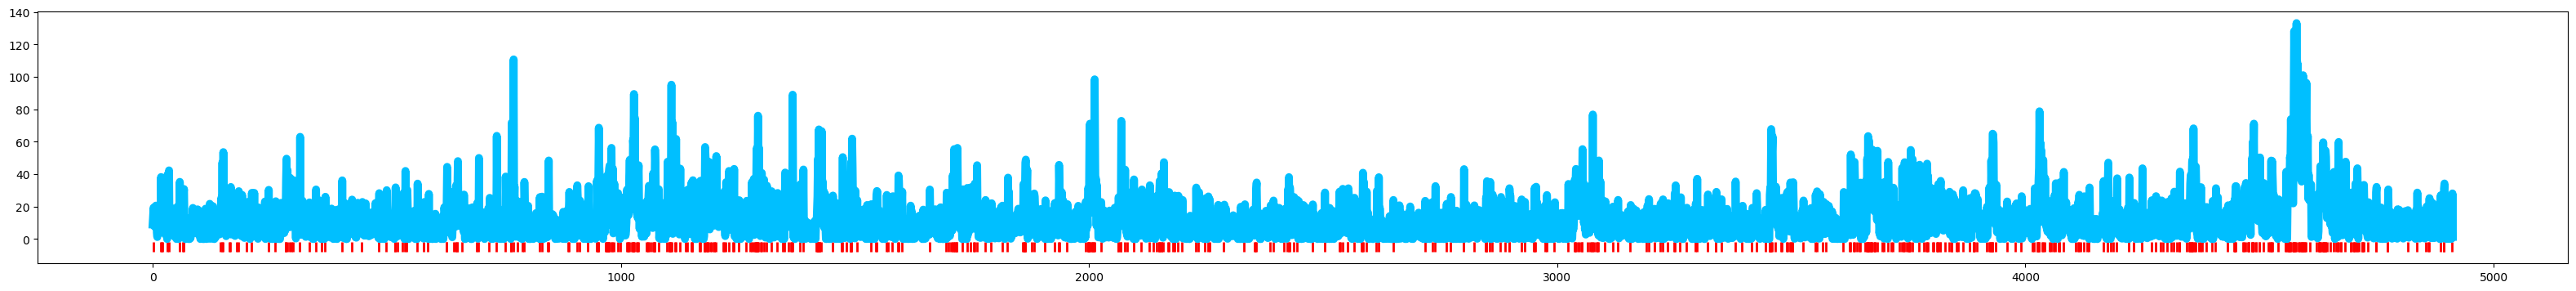

In [113]:

from scipy.ndimage import gaussian_filter1d

rdm = random.sample(range(0, data.shape [0]), 10)

for i in rdm:
    trace = data[i]
    bind = bindd[i]

    plt.figure(figsize = (40,4))    
    plt.plot(trace, c = 'deepskyblue', linewidth = 7)
    for x in np.where(bind == 1)[0]: plt.vlines(x=x,  alpha = 1, ymin = -8, ymax = -2, color = 'red', linewidth = 2)
    plt.show()

In [42]:
#Load developmental data
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*dff*')
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*labcoor*')
len(trace_l), len(coord_l)

(150, 30)

In [105]:
#All neurons
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*reg*tr*')
dff_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*reg*delt*')
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*reg*bin*')
dff_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*reg*delt*')
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*reg*bin*')

len(trace_l), len(coord_l), len(dff_l)

(30, 30, 30)

In [106]:
dff_l[:3], trace_l[:3],bind_l[:3]

(['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regdeltaff.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regdeltaff.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regdeltaff.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy'])

In [107]:
dff_l[1], trace_l[1],bind_l[1]

('BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regdeltaff.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy')

In [108]:
delt = np.load(dff_l[1])
trace = np.load(trace_l[1])
bind = np.load(bind_l[1])


In [109]:
delt.shape, trace.shape,bind.shape

((14559, 4914), (14559, 4914), (14559, 4914))

In [104]:
delt.shape, trace.shape,bind.shape

((14559, 4914), (24477, 5733), (14559, 4914))

In [73]:
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*realtr*')
trace_l

['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLND

In [75]:
pr = np.load(trace_l[10])
pr[0]

array([ 8.81966171e+01, -4.00752097e-01,  5.54569397e+02, ...,
        3.08084412e+02, -2.74841642e+00,  1.22249886e+02], dtype=float32)

In [80]:
pr[4]

array([894.4754 ,  28.37283, 357.13254, ..., 101.30086, 235.58951,
       362.80646], dtype=float32)

In [68]:
pr = np.load(trace_l[0])
pr

array([[-4.4608583e+00,  4.3878751e+00,  6.4941992e+02, ...,
         3.8592245e+02,  2.4746797e+02,  1.7691220e+02],
       [ 1.5892515e+03,  7.5515784e+02,  1.3111333e+03, ...,
         2.9942767e+02,  1.6652362e+02,  4.0347443e+02],
       [ 2.1465468e+02,  2.1866428e+03,  1.2086118e+03, ...,
        -4.6677473e-01,  1.5798528e+02,  7.7582306e-01],
       ...,
       [ 2.4637550e-01, -6.7999029e-01, -1.0938400e+01, ...,
         1.1824801e+01, -5.0566750e+00,  1.6300457e+01],
       [-1.5456740e+00, -6.8531208e+00, -1.8173116e+00, ...,
         8.5742416e+00,  1.1901367e+00,  7.8926697e+00],
       [ 2.5418372e+00,  7.3278384e+00,  3.3624290e+01, ...,
         1.3673939e+01,  2.4071004e+00,  6.9960542e+00]], dtype=float32)